# Exploring `build_shapes.py` outputs

### Jupyter notebook needs to be improves

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys

module_path = os.path.abspath(os.path.join('../../')) # To import helpers
if module_path not in sys.path:
    sys.path.append(module_path+"/pypsa-earth/scripts")
    
from _helpers import sets_path_to_root

sets_path_to_root("pypsa-earth-project")

This is the repository path:  /home/anas/EDF/pypsa-earth-project
Had to go 2 folder(s) up.


<AxesSubplot:>

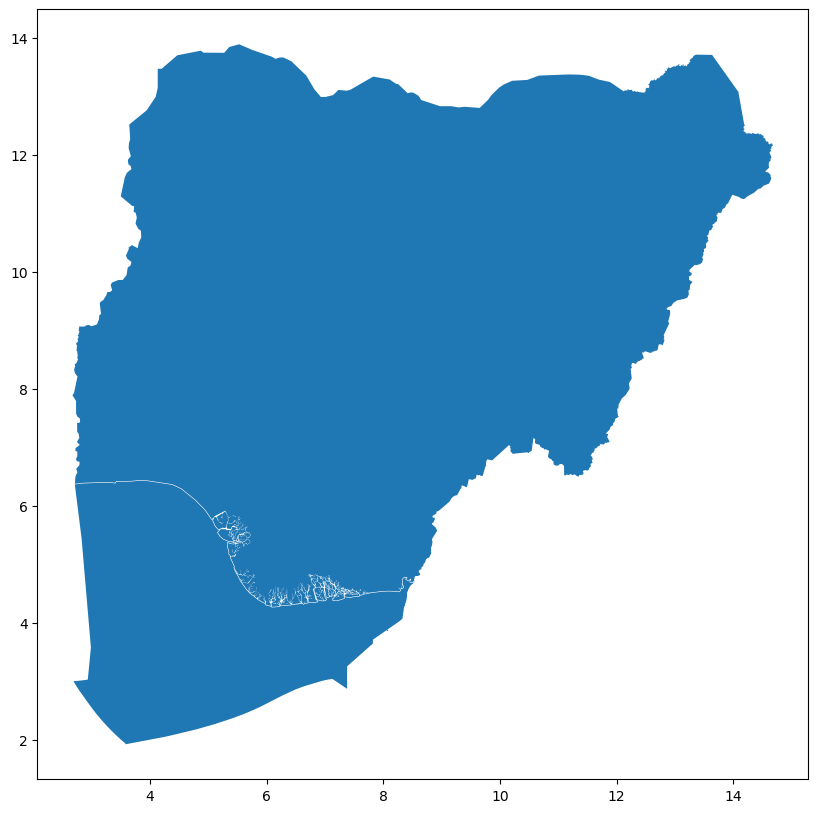

In [2]:
continent = gpd.read_file("pypsa-earth/resources/shapes/country_shapes.geojson")
off_shore = gpd.read_file("pypsa-earth/resources/shapes/offshore_shapes.geojson")
off_shore_old = gpd.read_file("pypsa-earth/resources/shapes/offshore_shapes.geojson")
gadm = gpd.read_file("pypsa-earth/resources/shapes/gadm_shapes.geojson")

ax = continent.plot(figsize=(10, 10))
off_shore.plot(ax=ax)

In [3]:
off_shore

,name,geometry
0,NG,"MULTIPOLYGON (((8.54140 4.70052, 8.53477 4.698..."


<AxesSubplot:>

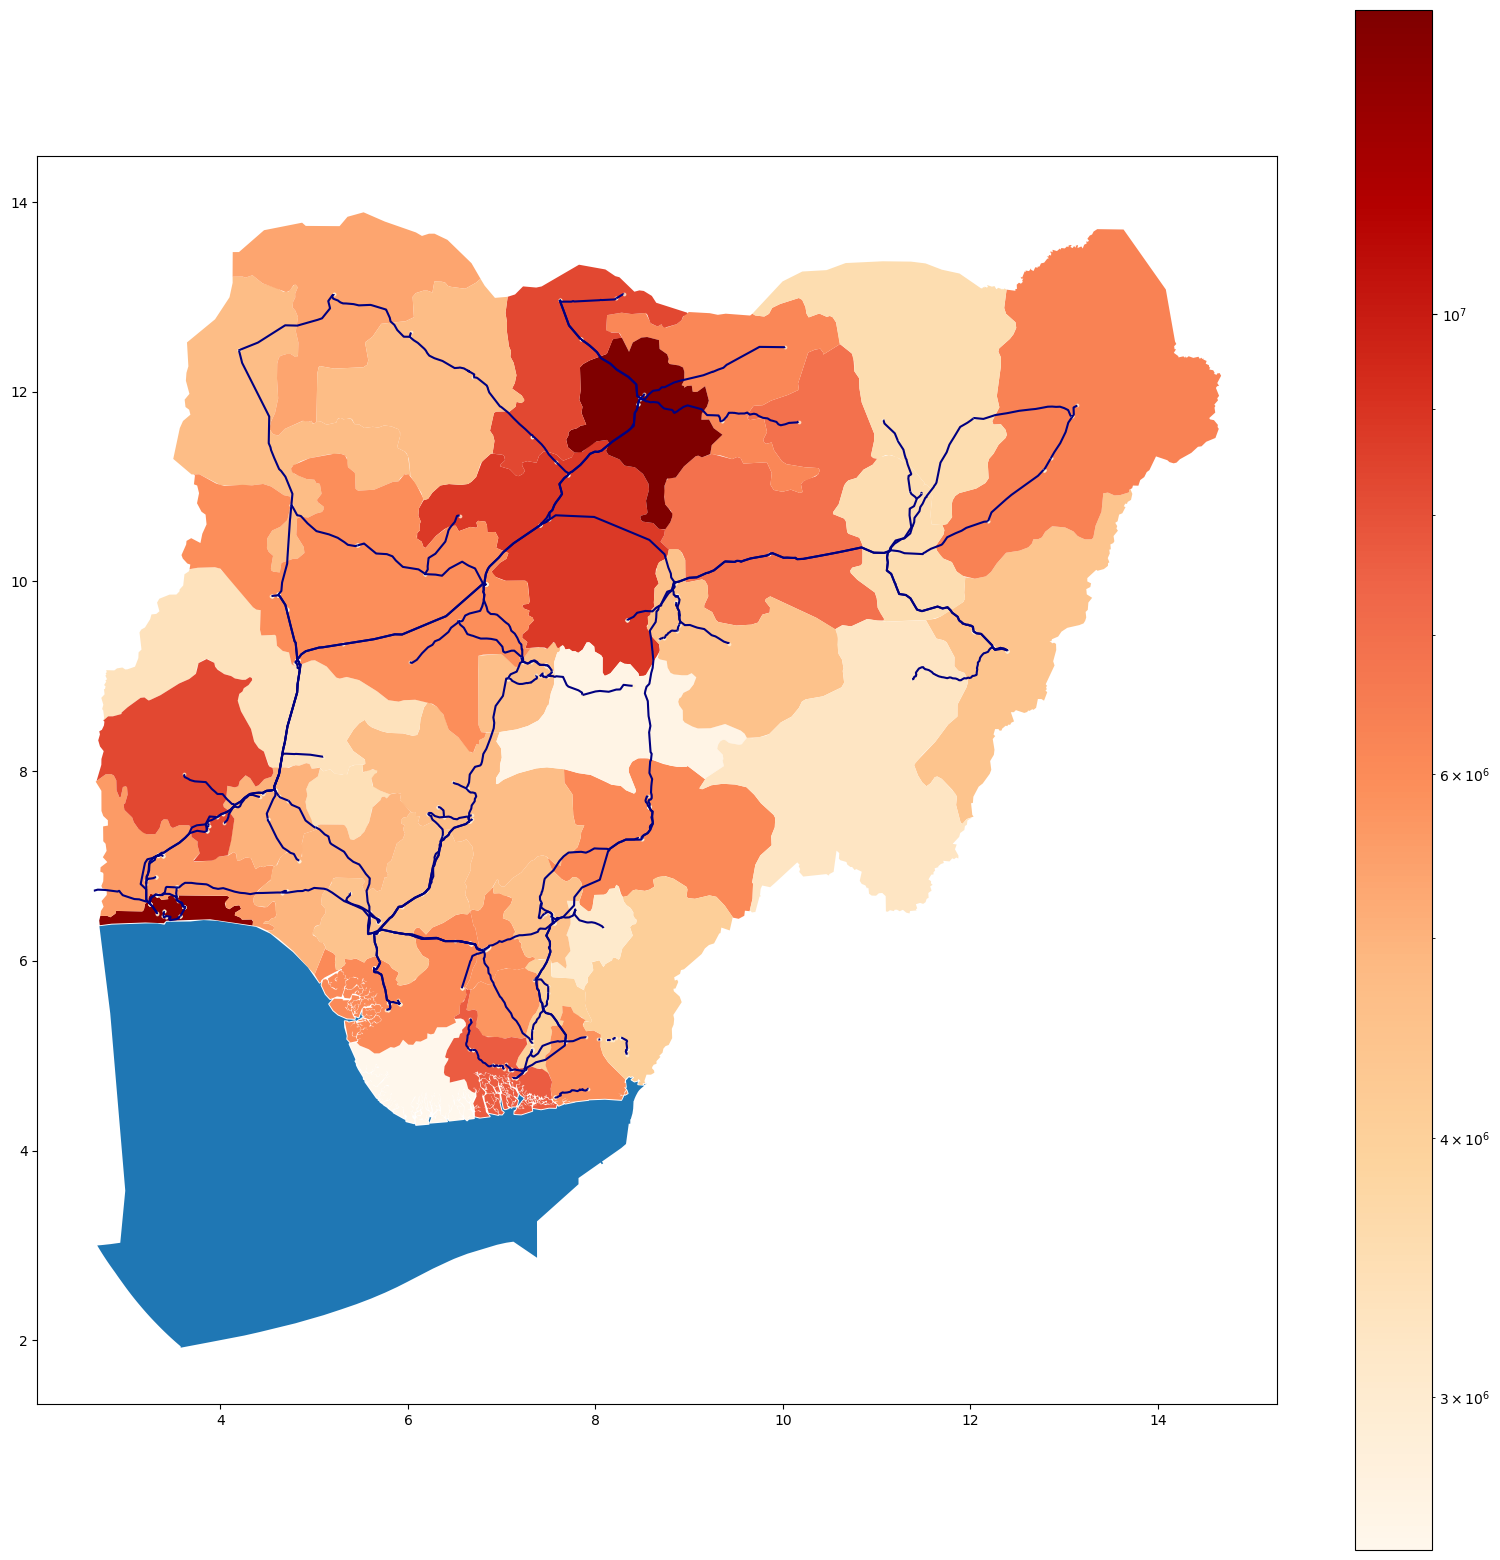

In [4]:
df_substations_osm_clean = gpd.read_file(
    os.getcwd() + "/pypsa-earth/resources/osm/clean/africa_all_substations.geojson"
)
df_lines_osm_clean = gpd.read_file(
    os.getcwd() + "/pypsa-earth/resources/osm/clean/africa_all_lines.geojson"
)


ax2 = gadm.plot(
    column="pop",
    cmap="OrRd",
    figsize=(20, 20),
    legend=True,
    norm=matplotlib.colors.LogNorm(vmin=gadm["pop"].min(), vmax=gadm["pop"].max()),
)  # column="pop",
off_shore.plot(ax=ax2, label="offshore")
df_lines_osm_clean.plot(ax=ax2, color="navy")
df_substations_osm_clean.plot(ax=ax2, color="papayawhip", alpha=0.7, markersize=3)


# plt.savefig("linkedin_post_small.png")

<AxesSubplot:>

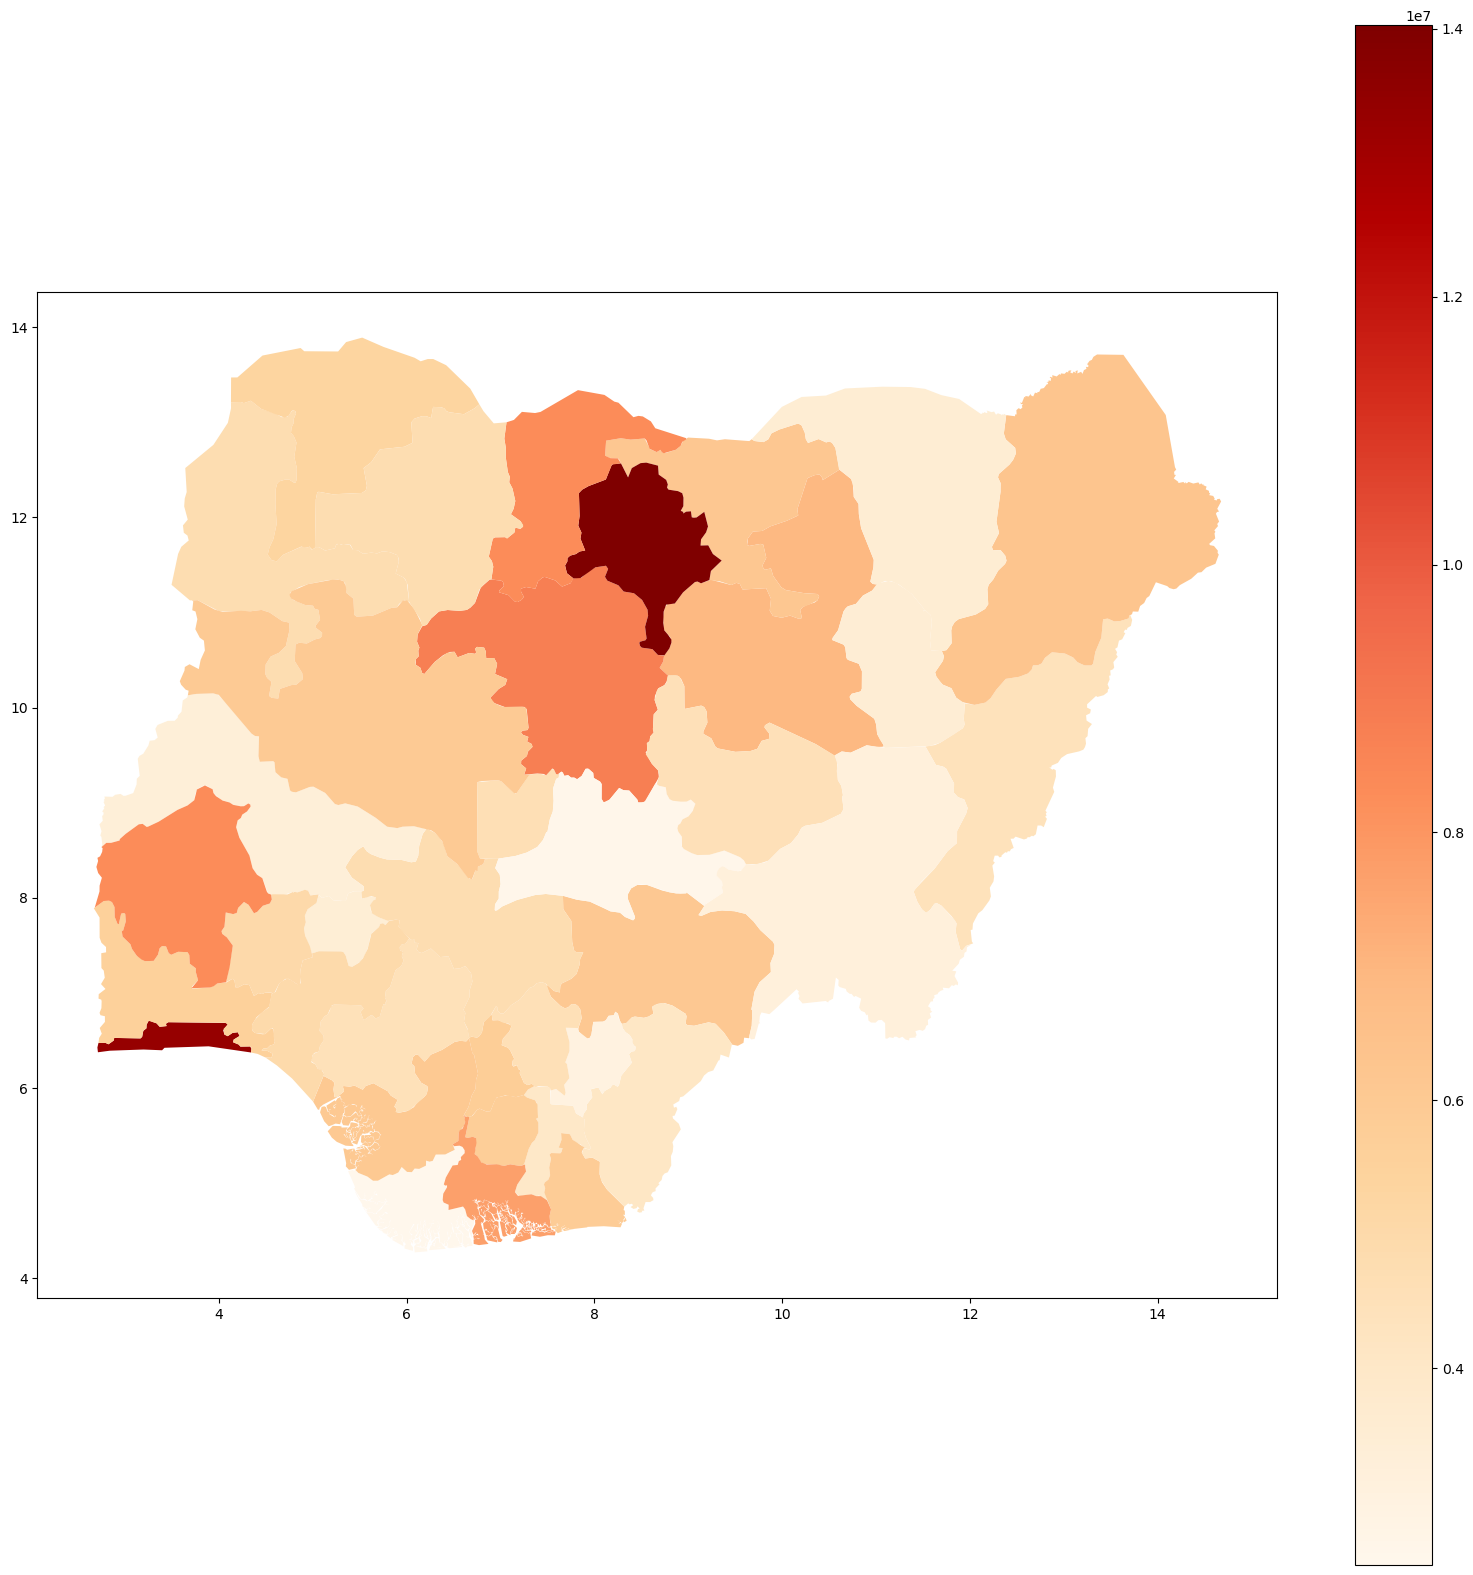

In [5]:
ax3 = gadm.plot(column="pop", cmap="OrRd", figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

<AxesSubplot:>

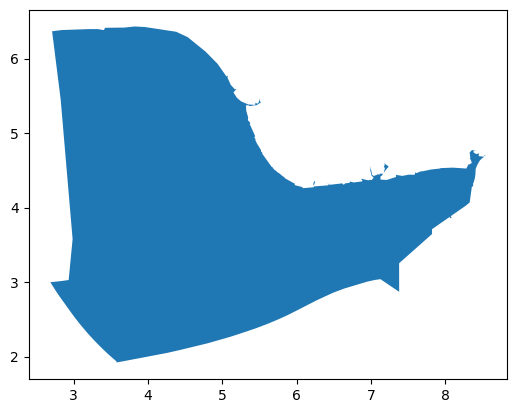

In [6]:
ret_df = off_shore.copy()
#off_shore.plot()

for c_code in ["NG"]:
    selection = ret_df.name == c_code
    n_offshore_shapes = selection.sum()

    if n_offshore_shapes > 1:
        # when multiple shapes per country, then merge polygons

        geom = ret_df[selection].geometry.unary_union
        print("TO DROP: ", ret_df[selection].index)
        ret_df.drop(ret_df[selection].index, inplace=True)
        ret_df.iloc[-1] = [c_code, geom]
ret_df.plot()